In [1]:
import itk
print(itk.Version.GetITKVersion())

5.4.0


In [2]:
import vtk
print(vtk.__version__)

9.3.0


In [3]:
import matplotlib.pyplot as plt

## Translation Transform x Regular Step Optimizer

In [4]:
# Load the fixed and moving images
fixed_image_path = './Data/case6_gre1.nrrd'
moving_image_path = './Data/case6_gre2.nrrd'

fixed_image = itk.imread(fixed_image_path, itk.F)
moving_image = itk.imread(moving_image_path, itk.F)

# Define the registration components
Dimension = 3
FixedImageType = itk.Image[itk.F, Dimension]
MovingImageType = itk.Image[itk.F, Dimension]

TransformType = itk.TranslationTransform[itk.D, Dimension]
initial_transform = TransformType.New()

OptimizerType = itk.RegularStepGradientDescentOptimizerv4[itk.D]
optimizer = OptimizerType.New()

MetricType = itk.MeanSquaresImageToImageMetricv4[FixedImageType, MovingImageType]
metric = MetricType.New()

RegistrationType = itk.ImageRegistrationMethodv4[FixedImageType, MovingImageType]
registration = RegistrationType.New()

In [5]:
# Set up the registration
registration.SetMetric(metric)
registration.SetOptimizer(optimizer)
registration.SetInitialTransform(initial_transform)
registration.SetFixedImage(fixed_image)
registration.SetMovingImage(moving_image)

# Define the optimizer parameters
optimizer.SetLearningRate(4.0)
optimizer.SetMinimumStepLength(0.001)
optimizer.SetNumberOfIterations(200)

In [6]:
# Start the registration process
registration.Update()

In [7]:
# Get the resulting transformation
final_transform = registration.GetTransform()

# Resample the moving image to align with the fixed image
ResampleFilterType = itk.ResampleImageFilter[MovingImageType, FixedImageType]
resampler = ResampleFilterType.New()
resampler.SetTransform(final_transform)
resampler.SetInput(moving_image)
resampler.SetSize(fixed_image.GetLargestPossibleRegion().GetSize())
resampler.SetOutputOrigin(fixed_image.GetOrigin())
resampler.SetOutputSpacing(fixed_image.GetSpacing())
resampler.SetOutputDirection(fixed_image.GetDirection())
resampler.SetDefaultPixelValue(0)

# Save the registered image
output_image_path = './Data/case6_gre2_registered.nrrd'
itk.imwrite(resampler.GetOutput(), output_image_path)

print("Registration completed successfully.")

Registration completed successfully.


## Affine Transform x Regular Step Optimizer x Shrink

In [33]:
# Load the fixed and moving images
fixed_image_path = './Data/case6_gre1.nrrd'
moving_image_path = './Data/case6_gre2.nrrd'

fixed_image = itk.imread(fixed_image_path, itk.F)
moving_image = itk.imread(moving_image_path, itk.F)

# Define the registration components
Dimension = 3
FixedImageType = itk.Image[itk.F, Dimension]
MovingImageType = itk.Image[itk.F, Dimension]

TransformType = itk.AffineTransform[itk.D, Dimension]
initial_transform = TransformType.New()
initial_transform.SetIdentity()

OptimizerType = itk.RegularStepGradientDescentOptimizerv4[itk.D]
optimizer = OptimizerType.New()

MetricType = itk.MeanSquaresImageToImageMetricv4[FixedImageType, MovingImageType]
metric = MetricType.New()

RegistrationType = itk.ImageRegistrationMethodv4[FixedImageType, MovingImageType]
registration = RegistrationType.New()

In [34]:
# Set up the registration
registration.SetMetric(metric)
registration.SetOptimizer(optimizer)
registration.SetInitialTransform(initial_transform)
registration.SetFixedImage(fixed_image)
registration.SetMovingImage(moving_image)

# Define the optimizer parameters
optimizer.SetLearningRate(1.0)
optimizer.SetMinimumStepLength(0.01)
optimizer.SetNumberOfIterations(200)

In [35]:
# Define the shrink factors for each level
shrink_factors_per_level = [4, 2, 1]

# Define the smoothing sigmas for each level
smoothing_sigmas_per_level = [2, 1, 0]

registration.SetShrinkFactorsPerLevel(shrink_factors_per_level)
registration.SetSmoothingSigmasPerLevel(smoothing_sigmas_per_level)

In [36]:
# Start the registration process
registration.Update()

In [37]:
# Get the resulting transformation
final_transform = registration.GetTransform()

# Resample the moving image to align with the fixed image
ResampleFilterType = itk.ResampleImageFilter[MovingImageType, FixedImageType]
resampler = ResampleFilterType.New()
resampler.SetTransform(final_transform)
resampler.SetInput(moving_image)
resampler.SetSize(fixed_image.GetLargestPossibleRegion().GetSize())
resampler.SetOutputOrigin(fixed_image.GetOrigin())
resampler.SetOutputSpacing(fixed_image.GetSpacing())
resampler.SetOutputDirection(fixed_image.GetDirection())
resampler.SetDefaultPixelValue(0)
# resampler = itk.ResampleImageFilter.New(Input=moving_image, Transform=final_transform, UseReferenceImage=True, ReferenceImage=fixed_image)

# Save the registered image
output_image_path = './Data/case6_gre2_registered_aff_shrk_rsmp.nrrd'
itk.imwrite(resampler.GetOutput(), output_image_path)

print("Registration completed successfully.")

Registration completed successfully.


## Rigid Transform

In [21]:
# Load the fixed and moving images
fixed_image_path = './Data/case6_gre1.nrrd'
moving_image_path = './Data/case6_gre2.nrrd'

fixed_image = itk.imread(fixed_image_path, itk.F)
moving_image = itk.imread(moving_image_path, itk.F)

# Define the registration components
Dimension = 3
FixedImageType = itk.Image[itk.F, Dimension]
MovingImageType = itk.Image[itk.F, Dimension]

RigidTransformType = itk.VersorRigid3DTransform[itk.D]
TransformInitializerType = itk.CenteredTransformInitializer[RigidTransformType, FixedImageType, MovingImageType]

In [22]:
OptimizerType = itk.RegularStepGradientDescentOptimizer
optimizer = OptimizerType.New()

MetricType = itk.MattesMutualInformationImageToImageMetric[FixedImageType, MovingImageType]
metric = MetricType.New()

InterpolatorType = itk.LinearInterpolateImageFunction[MovingImageType, itk.D]
interpolator = InterpolatorType.New()

RegistrationType = itk.ImageRegistrationMethod[FixedImageType, MovingImageType]
registration = RegistrationType.New()

In [23]:
registration = RegistrationType.New()
registration.SetMetric(metric)
registration.SetOptimizer(optimizer)
registration.SetInterpolator(interpolator)

In [24]:
IdentityTransformType = itk.IdentityTransform[itk.D, Dimension]
identityTransform = IdentityTransformType.New()

registration.SetFixedImage(fixed_image)
registration.SetMovingImage(moving_image)

In [25]:
metric.SetNumberOfHistogramBins(50)

fixedRegion = fixed_image.GetBufferedRegion()
numberOfPixels = fixedRegion.GetNumberOfPixels()
metric.ReinitializeSeed(76926294)

In [26]:
initializer = TransformInitializerType.New()
rigidTransform = RigidTransformType.New()

initializer.SetTransform(rigidTransform)
initializer.SetFixedImage(fixed_image)
initializer.SetMovingImage(moving_image)
initializer.MomentsOn()

In [27]:
initializer.InitializeTransform()
registration.SetFixedImageRegion(fixedRegion)
registration.SetInitialTransformParameters(rigidTransform.GetParameters())

registration.SetTransform(rigidTransform)

In [28]:
number_of_parameters = rigidTransform.GetNumberOfParameters()
optimizerScales = [1.0] * number_of_parameters
translationScale = 1.0 / 1000.0
optimizerScales[3] = translationScale
optimizerScales[4] = translationScale
optimizerScales[5] = translationScale

In [29]:
optimizer.SetScales(optimizerScales)

optimizer.SetMaximumStepLength(0.2000)
optimizer.SetMinimumStepLength(0.0001)

optimizer.SetNumberOfIterations(200)

In [30]:
metric.SetNumberOfSpatialSamples(10000)

In [31]:
registration.Update()

In [32]:
# rigidTransform.SetParameters(registration.GetLastTransformParameters())

In [33]:
# Get the resulting transformation
# final_transform = registration.GetTransform()

# Resample the moving image to align with the fixed image
# ResampleFilterType = itk.ResampleImageFilter[MovingImageType, FixedImageType]
# resampler = ResampleFilterType.New()
# resampler.SetTransform(final_transform)
# resampler.SetInput(moving_image)
# resampler.SetSize(fixed_image.GetLargestPossibleRegion().GetSize())
# resampler.SetOutputOrigin(fixed_image.GetOrigin())
# resampler.SetOutputSpacing(fixed_image.GetSpacing())
# resampler.SetOutputDirection(fixed_image.GetDirection())
# resampler.SetDefaultPixelValue(0)

final_transform = RigidTransformType.New()
final_transform.SetParameters(registration.GetLastTransformParameters())
final_transform.SetFixedParameters(rigidTransform.GetFixedParameters())

ResampleFilterType = itk.ResampleImageFilter[MovingImageType, FixedImageType]
resampler = ResampleFilterType.New()
resampler.SetTransform(final_transform)
resampler.SetInput(moving_image)
resampler.SetSize(fixed_image.GetLargestPossibleRegion().GetSize())
resampler.SetOutputOrigin(fixed_image.GetOrigin())
resampler.SetOutputSpacing(fixed_image.GetSpacing())
resampler.SetOutputDirection(fixed_image.GetDirection())
# resampler.SetDefaultPixelValue(0)
resampler.SetDefaultPixelValue(100)

# Save the registered image
output_image_path = './Data/case6_gre2_registered_rigid.nrrd'
itk.imwrite(resampler.GetOutput(), output_image_path)

print("Registration completed successfully.")

Registration completed successfully.


In [34]:
OutputPixelType = itk.US
OutputImageType = itk.Image[OutputPixelType, Dimension]

caster = itk.CastImageFilter[FixedImageType, OutputImageType].New()
writer = itk.ImageFileWriter[OutputImageType].New()

writer.SetFileName('./Data/case6_gre2_registered_rigid.nrrd')
caster.SetInput(resampler.GetOutput())
writer.SetInput(caster.GetOutput())
writer.Update()

In [35]:
difference_filter = itk.SubtractImageFilter[FixedImageType, FixedImageType, FixedImageType].New()
difference_filter.SetInput1(fixed_image)
difference_filter.SetInput2(resampler.GetOutput())

writer2 = itk.ImageFileWriter[OutputImageType].New()

intensity_rescaler = itk.RescaleIntensityImageFilter[FixedImageType, OutputImageType].New()
intensity_rescaler.SetInput(difference_filter.GetOutput())
intensity_rescaler.SetOutputMinimum(0)
intensity_rescaler.SetOutputMaximum(255)

writer2.SetInput(intensity_rescaler.GetOutput())
resampler.SetDefaultPixelValue(1)

In [39]:
!rm "./Data/case6_gre2_differenceafter.nrrd" "./Data/case6_gre2_differencebefore.nrrd"

In [36]:
writer2.SetFileName("./Data/case6_gre2_differenceafter.nrrd")
writer2.Update()

In [40]:
resampler.SetTransform(identityTransform)
writer2.SetFileName("./Data/case6_gre2_differencebefore.nrrd")
writer2.Update()

## Visualization

In [19]:
def show(images_path, PixelType = itk.US, n_slice = 100):
    fig = plt.figure(figsize=(10, 10))
    columns = 3
    rows = len(images_path) // columns + 1
    for i in range(0, len(images_path)):
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(itk.imread(images_path[i], PixelType)[n_slice, :, :])
    plt.show()

FileNotFoundError: File ./Data/case6_gre2_differenceafter.nrrd does not exist.

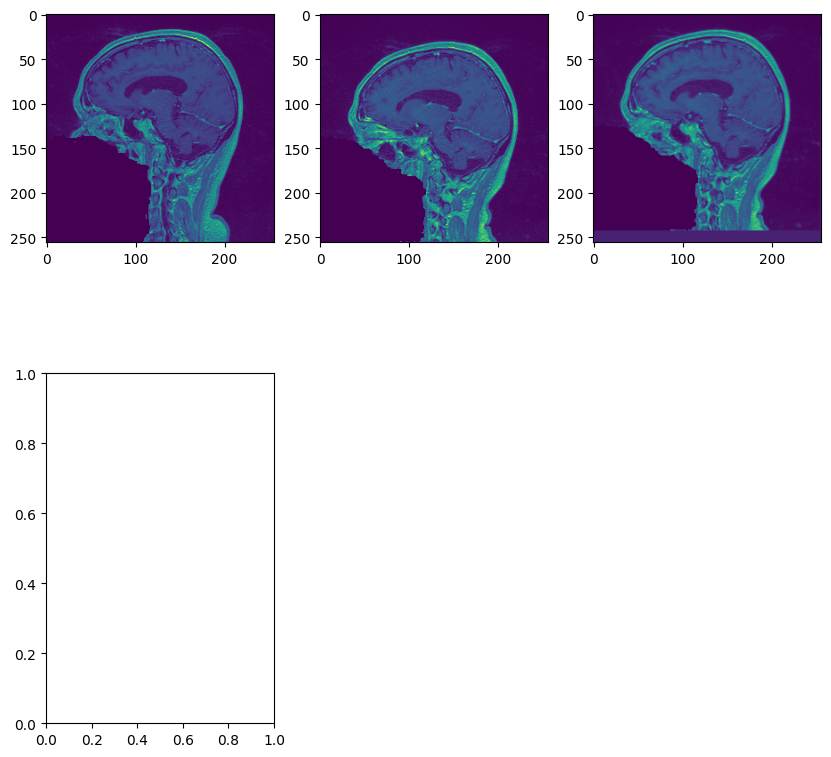

In [41]:
show(["./Data/case6_gre1.nrrd", "./Data/case6_gre2.nrrd", "./Data/case6_gre2_registered_rigid.nrrd", "./Data/case6_gre2_differenceafter.nrrd", "./Data/case6_gre2_differencebefore.nrrd"])

### other images

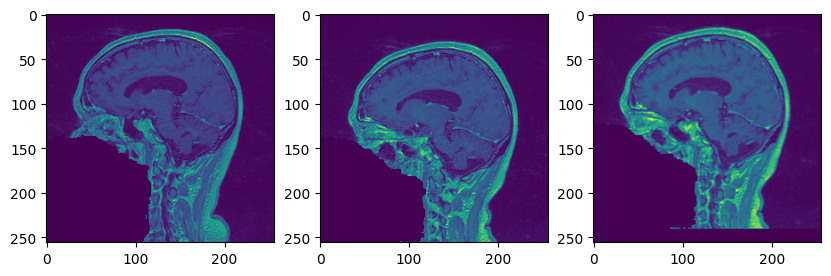

In [13]:
show(["./Data/case6_gre1.nrrd", "./Data/case6_gre2.nrrd", "./Data/case6_gre2_registered.nrrd"])

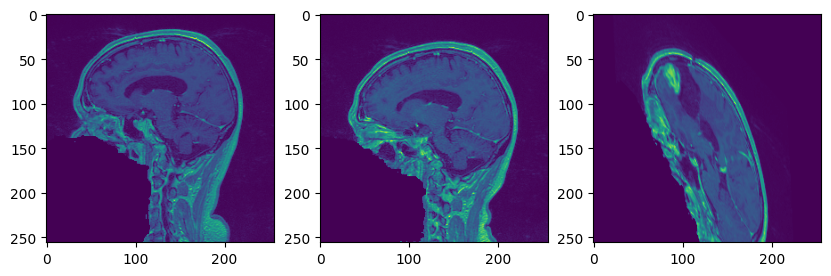

In [20]:
show(["./Data/case6_gre1.nrrd", "./Data/case6_gre2.nrrd", "./Data/case6_gre2_registered_aff_shrk.nrrd"])

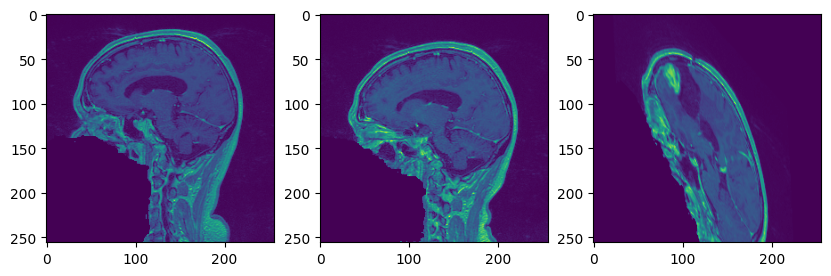

In [38]:
show(["./Data/case6_gre1.nrrd", "./Data/case6_gre2.nrrd", "./Data/case6_gre2_registered_aff_shrk_rsmp.nrrd"])

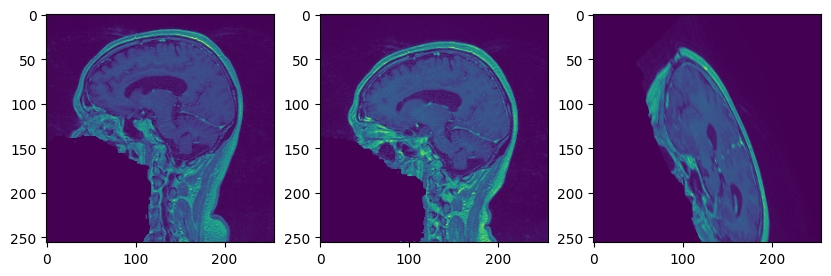

In [32]:
show(["./Data/case6_gre1.nrrd", "./Data/case6_gre2.nrrd", "./Data/case6_gre2_registered_aff_rsmp.nrrd"])

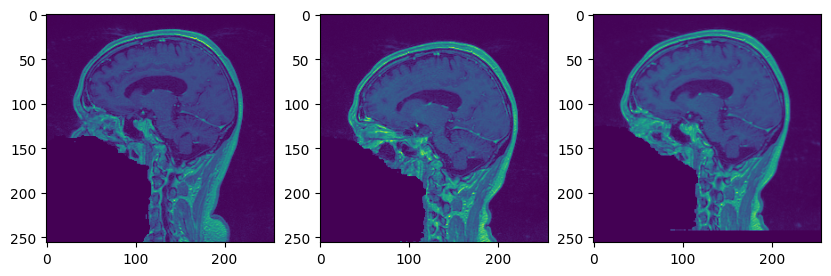

In [95]:
show(["./Data/case6_gre1.nrrd", "./Data/case6_gre2.nrrd", "./Data/case6_gre2_registered_rigid.nrrd"])